In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import glob
import datetime
import time

In [267]:
# XINRAN 1KG - 19th Aug, second one!

# Get CSV files list from a folder
# order = acc, bvp, eda, hr, ibi, tag, temp
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/Yang/500/1662388776_A0275C/'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = [pd.read_csv(file) for file in csv_files]

eda = df_list[2]
ibi = df_list[4]
tag = df_list[5]
temp = df_list[6]

In [268]:
tag

,1662389865.42
0,1.662390e+09
1,1.662390e+09
2,1.662391e+09
3,1.662391e+09
4,1.662391e+09
5,1.662391e+09
6,1.662392e+09
7,1.662392e+09
8,1.662392e+09


In [269]:
# converting the header into the a single starting timestamp, 
# each physiological data is different
def timeConvert(trial):
  time_header = float(trial.columns.values[0])
  time = pd.Timestamp(time_header, unit ='s', tz= 'UTC').round('S')
  return time
tag_time = timeConvert(tag)
eda_time = timeConvert(eda)
temp_time = timeConvert(temp)

# Physiological data
timeFrameEDA = pd.Series(pd.date_range(eda_time,periods = len(eda),freq = '250ms'))
timeFrameTEMP = pd.Series(pd.date_range(temp_time,periods = len(temp), freq = '250ms'))

eda.columns = ['EDA']
temp.columns = ['TEMP']

eda.insert(0, 'timeStamp',timeFrameEDA)
temp.insert(0,'timeStamp', timeFrameTEMP)

# Tag data
# convert the unix timstamp of each tagged event into the datetime format time stamp
# [tag_time] required otherwise the first initial tag (header) won't be converted
t = int(tag.count())
tag_lst = []
time_tag_s =[tag_time]

for i in range(0,t):
  time_tag = list(map(float,tag.iloc[i]))
  tag_lst.append(time_tag)
  tt = pd.Timestamp(tag_lst[i][0], unit = 's', tz = 'UTC').round('S')
  time_tag_s.append(tt)

timeFrameTAG = pd.Series(time_tag_s)
tag = pd.DataFrame(np.vstack([tag.columns,tag]))
tag.insert(0,'timeStamp', timeFrameTAG)
tag.columns = ["timeStamp","Tag"]


In [270]:
tag

,timeStamp,Tag
0,2022-09-05 14:57:45+00:00,1662389865.42
1,2022-09-05 15:01:39+00:00,1662390098.56
2,2022-09-05 15:04:55+00:00,1662390295.12
3,2022-09-05 15:08:24+00:00,1662390503.52
4,2022-09-05 15:11:38+00:00,1662390697.77
5,2022-09-05 15:14:53+00:00,1662390893.34
6,2022-09-05 15:18:13+00:00,1662391093.06
7,2022-09-05 15:25:06+00:00,1662391506.39
8,2022-09-05 15:25:30+00:00,1662391529.92
9,2022-09-05 15:29:42+00:00,1662391781.75


In [271]:
tag.drop([7], axis = 0, inplace = True)
tag.reset_index(drop= True, inplace = True)


In [262]:
t_cop = tag.copy()
t_cop.drop([7], axis = 0, inplace = True)
t_cop.reset_index(drop= True, inplace = True)
t_cop

,timeStamp,Tag
0,2022-09-05 14:57:45+00:00,1662389865.42
1,2022-09-05 15:01:39+00:00,1662390098.56
2,2022-09-05 15:04:55+00:00,1662390295.12
3,2022-09-05 15:08:24+00:00,1662390503.52
4,2022-09-05 15:11:38+00:00,1662390697.77
5,2022-09-05 15:14:53+00:00,1662390893.34
6,2022-09-05 15:18:13+00:00,1662391093.06
7,2022-09-05 15:25:30+00:00,1662391529.92
8,2022-09-05 15:29:42+00:00,1662391781.75


# Ignore this unless tags are incorrect

In [272]:
tag

,timeStamp,Tag
0,2022-09-05 14:57:45+00:00,1662389865.42
1,2022-09-05 15:01:39+00:00,1662390098.56
2,2022-09-05 15:04:55+00:00,1662390295.12
3,2022-09-05 15:08:24+00:00,1662390503.52
4,2022-09-05 15:11:38+00:00,1662390697.77
5,2022-09-05 15:14:53+00:00,1662390893.34
6,2022-09-05 15:18:13+00:00,1662391093.06
7,2022-09-05 15:25:30+00:00,1662391529.92
8,2022-09-05 15:29:42+00:00,1662391781.75


In [277]:
tst = tag.timeStamp[6]
one_min = pd.Timedelta( '1 minute')
two_min = pd.Timedelta('2 minute, 41 seconds')
new = tst + +one_min + two_min

tag_test = tag.copy()
tag_test.loc[6.5] = new
tag_test = tag_test.sort_index().reset_index(drop= True)
# tag_test.drop(5, axis = 0, inplace = True)
# tag_test.reset_index(drop = True, inplace  = True)


In [278]:
tag

,timeStamp,Tag
0,2022-09-05 14:57:45+00:00,1662389865.42
1,2022-09-05 15:01:39+00:00,1662390098.56
2,2022-09-05 15:04:55+00:00,1662390295.12
3,2022-09-05 15:08:24+00:00,1662390503.52
4,2022-09-05 15:11:38+00:00,1662390697.77
5,2022-09-05 15:14:53+00:00,1662390893.34
6,2022-09-05 15:18:13+00:00,1662391093.06
7,2022-09-05 15:21:54+00:00,2022-09-05 15:21:54+00:00
8,2022-09-05 15:25:30+00:00,1662391529.92
9,2022-09-05 15:29:42+00:00,1662391781.75


# This is the part that has to be changed each time to align the actual tagged event with the tag number

# IBI time converstion (slightly different from other data as it requires resampling)

In [279]:
initial_ibi_time = ibi.columns.values[0]
first_ibi_time = pd.Timestamp(float(initial_ibi_time), unit ='s', tz= 'UTC')
time_ibi = []

# For each element under the header '1657029219' column, convert the element into timeStamp & appended to the time_hold
for i in range(0, len(ibi)):
  s = ibi.loc[i,ibi.columns[0]]
  ibi_each= str(s)+'s'
  s = pd.Timedelta(ibi_each)
  s = first_ibi_time + s
  time_ibi.append(s)

# 
timeFrameIBI = pd.Series(time_ibi) 
ibi.insert(0, 'timeStamp',timeFrameIBI)
ibi.columns = ['timeStamp', 'distance','IBI_1']
ibi['timeStamp'] = pd.to_datetime(ibi['timeStamp'], unit= 's')

# resampling
ibi_r = ibi.resample('S', on = 'timeStamp').mean()
ibi_resample = ibi_r.interpolate(method = 'linear')
ibi_resample.reset_index(inplace = True)
ibi_resample.columns = ["timeStamp","distance","IBI_1"]

# Calculating HR from resampled IBI
hr = []
for i in ibi_resample.loc[:,'IBI_1']:
  hr_hold = 60/i
  hr.append(hr_hold)
  
ibi_resample['HR'] = pd.Series(hr)


# RESTING


In [280]:
tag.loc[0,'timeStamp']
# pd.Timedelta('27 minute, 14 seconds')


Timestamp('2022-09-05 14:57:45+0000', tz='UTC')

In [285]:
tag.timeStamp[0]- length_rest

Timestamp('2022-09-05 14:53:00+0000', tz='UTC')

In [284]:
# get the resting time for each participant

# Human
# ==================== Yang ====================
# 0g ---> resting              = 33:50 - 37:00
# length_rest = pd.Timedelta("4 minute,1 second")

# 1KG ---> resting              = 29:07 - 32:11
# length_rest = pd.Timedelta("7 minute,22 second")

# # 500g ---> resting              = 53:00 - 54:49
length_rest = pd.Timedelta("4 minute, 45 second")


# ==================== Me ====================

# 0g ---> resting              = 47:30 - 51:06
# length_rest = pd.Timedelta("10 minute,20 second")

# 1KG ---> resting              = 46:25 - 52:28
# length_rest = pd.Timedelta("8 minute,21 second")

# # 500g ---> resting              = 56:14 - 00:48
# length_rest = pd.Timedelta("8 minute, 51 second")


# ==================== Haonan ====================
# 0g ---> resting              = 25:25 - 28:21
# length_rest = pd.Timedelta("3 minute,0 second")

# 1KG ---> resting              = 30:26 - 31:49
# length_rest = pd.Timedelta("2 minute,22 second")

# # 500g ---> resting              = 38:39 - 41:30
# length_rest = pd.Timedelta("3 minute, 41 second")


# ==================== Digby ====================
# 0g ---> resting              = 52:52 - 56:10
# length_rest = pd.Timedelta("4 minute, 22 second")

# 1KG ---> resting              = 45:20 - 48:22 
# length_rest = pd.Timedelta("3 minute, 30 second")

# 500g ---> resting              = 21:41 - 24:41
# length_rest = pd.Timedelta("4 minute, 0 second")

# ==================== Laila ====================
# 0g ---> resting              = 52:07 - 53:05
# length_rest = pd.Timedelta("2 minute, 19 second")

# 1KG ---> resting              = 40:25 - 43:05
# length_rest = pd.Timedelta("3 minute, 3 second")

# 500g ---> resting             = 12:11 - 15:25
# length_rest = pd.Timedelta("3 minute, 38 second")



# Weight
# ==================== Xinran ====================
# 500g ---> resting             = 27:14 - 28:34
# length_rest = pd.Timedelta("4 minute, 38 second")

# 1KG ---> resting             = 09:20 - 12:15
# length_rest = pd.Timedelta("7 minute, 15 second")


# ==================== Zijun ====================
# 500g ---> resting            = 13:01 - 15:51
# length_rest = pd.Timedelta("3 minute")

# 1kg ----> resting            = 04:19 - 05:19
# length_rest = pd.Timedelta("4 minute, 20 seconds")

# 0g ---> resting              = 03:50 - 05:17
# length_rest = pd.Timedelta("2 minute, 4 seconds")

# ==================== Tristan ====================
# 1KG ---> resting             = 33:51 - 35:20
# length_rest = pd.Timedelta("9 minute, 38 seconds")

# 500g ---> resting             = 50:20 - start
# length_rest = pd.Timedelta("1 minute, 24 seconds")


# ==================== Peter ====================
# 500 g ---> resting            =09:44 - 10:29
# length_rest = pd.Timedelta("9 minute, 5 seconds")

# 1kg ---> resting              = 32:17 - 34:31
# length_rest = pd.Timedelta("4 minute, 13 seconds")


# ==================== Ming ====================
# 0g ---> resting           = 09:20 - 11:40
# length_rest =pd.Timedelta('5 minute, 18 seconds')

# 1kg ---> resting          = 01:35 - 02:28
# length_rest =pd.Timedelta('5 minute, 29 seconds')

# 500g ---> resting         = 49:25 - start
# length_rest =pd.Timedelta('1 minute, 5 second')


# ==================== Martina ====================
# 1kg ---> resting              = 15:11 - 16:09
# length_rest = pd.Timedelta("11 minute, 41 seconds")

# First 0g ---> resting          = 42:48 - 43:34
# length_rest = pd.Timedelta("7 minute, 10 seconds")

# 500 g
# resting --->          = 03:39 - 04:23
# length_rest = pd.Timedelta("4 minute, 37 seconds")

# last 0g --->          = 16:18 - 17:18
# length_rest = pd.Timedelta("1 minute, 22 seconds")


# Latency
# ==================== Wei ====================
# 0 ---> resting        = 10:01:04- 10:02:36
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("4 minute, 55 seconds")

# 300 ---> resting      = 53:37 -54:33
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("3 minute,52 seconds")

# 150 ---> resting      = 48:05 - 49:39
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("3 minute,8 seconds")


# ==================== Yukun ====================
# 0 ---> resting        = 1 min before start!

# 150 ---> resting      = 07:05 - 08:09
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("2 minute, 53 seconds")

# 300 ---> resting      =55:25 - 56:16
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("18 minute, 36 seconds")



# ==================== Mat ====================
# 150 ---> resting      = 32:10-:33:04
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("1 minute, 46 seconds")

# 300 ---> resting      = 40:53 - 41:14
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("6 minute,32 seconds")

# 0 ---> resting        = 30:12 - 31:35
# length_rest = pd.Timedelta("6 minute,28 seconds")



# ==================== Kelin ====================
# 150 ---> resting      = 13:51:19 - 13:51:47
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("14 minute, 46 seconds")

# 0 ---> resting        = 14:51 - 15:44
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("58 seconds")

# 300 ---> resting      =29:16 - 29:53



# ==================== Dong ====================

# 150 ----> resting     = 17:11:49 - 17:12:39
# _first_start = tag.timeStamp[1]
# length_rest = pd.Timedelta("13 minute, 7 seconds")

# 300 ----> resting   =31:25 - 32:33
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("10 minute, 55 seconds")

# 0 -----> resting      25:12 -29:14 
# length_rest = pd.Timedelta("4 minute, 7 seconds")


# ==================== Mariya ====================

# 0 ----> resting   = 49:30 - 52:18
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("9 minute, 47 seconds")

# 150 ---> resting = 44:51 - 45:45
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("7 minute, 9 seconds")

# 300 ---> resting = 17:17 - 17:39
# _first_start = tag.timeStamp[0]
# length_rest = pd.Timedelta("5 minute, 9 seconds")


In [289]:
_first_start = tag.timeStamp[0]
length_rest = pd.Timedelta("4 minute, 45 second")
rest_start = _first_start - length_rest
rest_duration = rest_start + pd.Timedelta("1 minutes, 52 seconds")
save_path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/Yang/500/'

def rest(trial, name):
  r = trial.query("timeStamp == @rest_start").index.values[0]
  # s = trial.query("timeStamp == @_first_start").index.values[0]
  s = trial.query("timeStamp == @rest_duration").index.values[0]     ############# Yang rest

  for i in range(r,s):
    trial_rest_data = trial.iloc[r:s].copy() 
    file_name = "Rest_"+name+".csv"
    trial_rest_data.to_csv(save_path+file_name, index =False)
  return trial_rest_data

# rest(eda,'EDA')
# rest(temp, 'TEMP')
# rest(ibi_resample,'HR')

,timeStamp,distance,IBI_1,HR
792,2022-09-05 14:53:00+00:00,804.492188,0.640625,93.658537
793,2022-09-05 14:53:01+00:00,805.484375,0.671875,89.302326
794,2022-09-05 14:53:02+00:00,806.437500,0.640625,93.658537
795,2022-09-05 14:53:03+00:00,807.437500,0.671875,89.302326
796,2022-09-05 14:53:04+00:00,808.460938,0.687500,87.272727
...,...,...,...,...
899,2022-09-05 14:54:47+00:00,911.640625,0.703125,85.333333
900,2022-09-05 14:54:48+00:00,912.328125,0.687500,87.272727
901,2022-09-05 14:54:49+00:00,913.359375,0.687500,87.272727
902,2022-09-05 14:54:50+00:00,914.390625,0.687500,87.272727


In [290]:

def all_data(trial):
  tg = list(range(0,10))
  data_all = []
  #for every tag
  for i in range(0,len(tg)):
    start = tag.timeStamp[tg[i]]            #each starting point
    length = pd.Timedelta('1 minute')   #fixed 1 minute
    duration = start + length           #fixed duration
    print(start, '¦' , length, '¦', duration)
    s = trial.query("timeStamp == @start").index.values[0]
    d = trial.query("timeStamp == @duration").index.values[0]

    trial_data = trial.iloc[s:d].copy()
    trial_data.drop('timeStamp', axis = 1,inplace = True)
    
    col_lst_name = set(['distance','IBI_1'])
    if col_lst_name.issubset(trial_data.columns):
      trial_data.drop('IBI_1', axis = 1, inplace = True)
      trial_data.drop('distance', axis = 1, inplace = True)
    # converting fromd dataframe to lst, index already reset here
    lst_all = trial_data.values.tolist()
    #Unpack individual [] for each trial
    for k in lst_all:
      data_all.append(*k) 
  #ONE fat chain of data
  return data_all
 #data_all[0] --> 1st trial        data_all[1] --> 2nd trial

In [291]:
def duration(trial, shape, name):
  t_lst = np.array(all_data(trial))
  t_all = pd.DataFrame(t_lst.reshape(-1,shape).transpose())
  colum_name = []
  for i in range(len(t_all.columns)):
    col_name =name+'_'+str(i)
    colum_name.append(col_name)
  t_all.columns = colum_name
  filename = name+ ' _Duration_1_MINS'+'.csv'
  t_all.to_csv(save_path +filename, index = False)
  return t_all

# 1 mins duration time
eda_all = duration(eda,240, 'EDA')
temp_all = duration(temp,240, 'TEMP')
ibi_all = duration(ibi_resample,60, 'HR')

2022-09-05 14:57:45+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 14:58:45+00:00
4356
4596
2022-09-05 15:01:39+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:02:39+00:00
5292
5532
2022-09-05 15:04:55+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:05:55+00:00
6076
6316
2022-09-05 15:08:24+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:09:24+00:00
6912
7152
2022-09-05 15:11:38+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:12:38+00:00
7688
7928
2022-09-05 15:14:53+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:15:53+00:00
8468
8708
2022-09-05 15:18:13+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:19:13+00:00
9268
9508
2022-09-05 15:21:54+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:22:54+00:00
10152
10392
2022-09-05 15:25:30+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:26:30+00:00
11016
11256
2022-09-05 15:29:42+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:30:42+00:00
12024
12264
2022-09-05 14:57:45+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 14:58:45+00:00
4356
4596
2022-09-05 15:01:39+00:00 ¦ 0 days 00:01:00 ¦ 2022-09-05 15:02:39+00:00
5292
5532
2022-09-05

# Plots and stuff


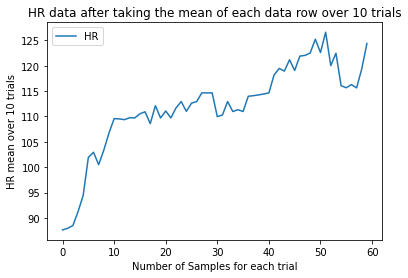

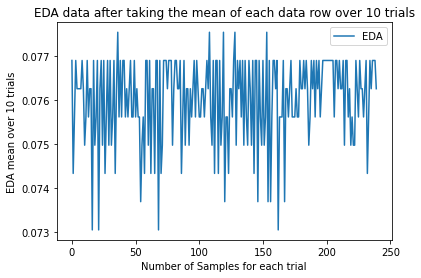

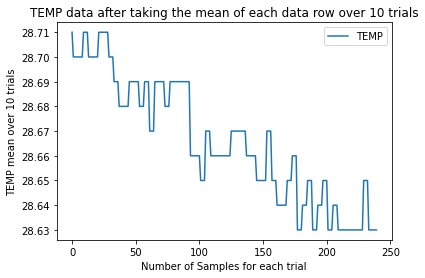

In [19]:
def general_trend(trial, shape,name):
  trial_m_lst = []
  for i in range(0,shape):
    #general trend
    row_m = np.median(trial.loc[i])
    trial_m_lst.append(row_m)
  title = name+'_rows_combine'
  
  x = range(0, shape)
  plt.plot(x, trial_m_lst, label = name)
  plt.title(name+' data after taking the mean of each data row over 10 trials')
  plt.xlabel('Number of Samples for each trial')
  plt.ylabel(name +' mean over 10 trials')
  plt.legend()
  # save_path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/Mariya/150 '
  # plt.savefig(save_path +'_row_combine graph, shows the general trend of the '+name+' during the 1 min B&B.jpg')
  # files.download( name+'_row_combine graph, shows the general trend of the '+name+' during the 1 min B&B.jpg')
  plt.show()
                      
general_trend(ibi_all, len(ibi_all), 'HR')

general_trend(eda_all, len(eda_all), 'EDA')

general_trend(temp_all, len(temp_all), 'TEMP')


# Do this after combining all participants data to see set 1, 2 and 3 differences

# All the different plots

In [37]:
# all[0] ----> HR_0
def col_plot(data):
    all = []
    for i in data.columns:
        all.append(data.loc[:,i])
    return all

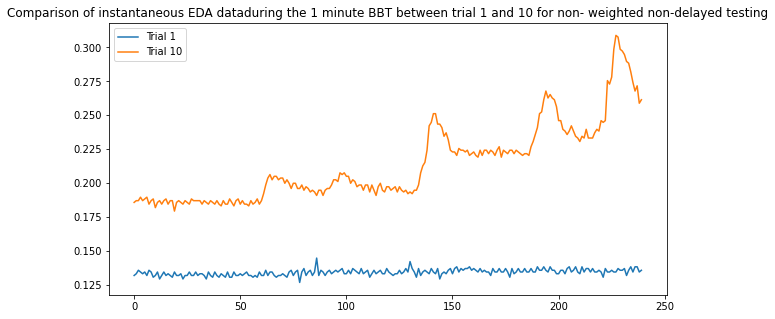

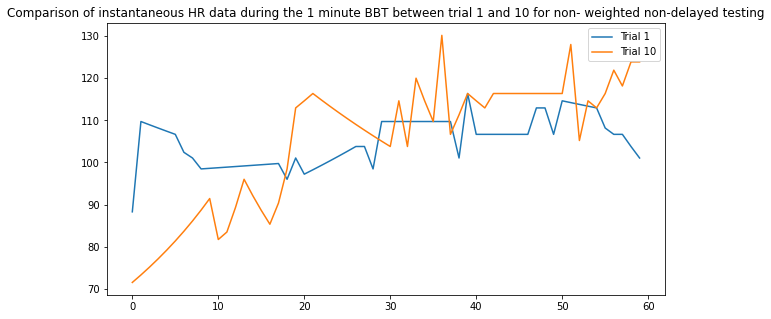

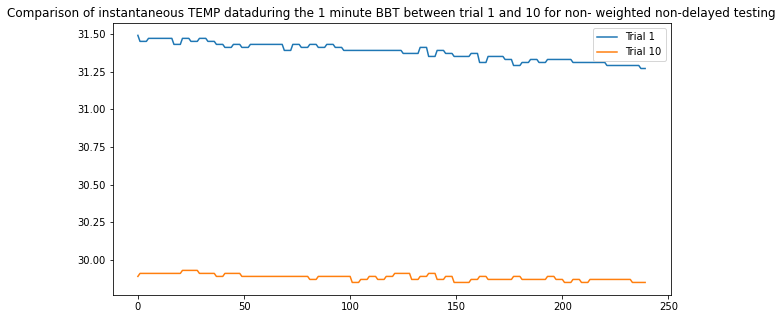

In [38]:
# weight = ' 1kg '
weight = 'non-'
# weight = '500g'
latency = 'non-delayed'
# latency = '150 ms delayed'
# latency = '300 ms delayed'
hr_cols = col_plot(ibi_all)
eda_cols = col_plot(eda_all)
temp_cols = col_plot(temp_all)

hr_x = range(0,len(ibi_all))
eda_x  = range(0, len(eda_all))
temp_x  = range(0, len(temp_all))

# ========================================== EDA ==========================================
plt.rcParams['figure.figsize'] =(10,5)
plt.plot(eda_x, eda_cols[0], label = 'Trial 1') # 1
# plt.plot(hr_x, hr_cols[1], label = hr_cols[1].name) # 
# plt.plot(hr_x, hr_cols[2], label = hr_cols[2].name) # 
# plt.plot(hr_x, hr_cols[3], label = hr_cols[3].name) # 
plt.plot(eda_x, eda_cols[9], label = 'Trial 10') # 10

plt.title('Comparison of instantaneous EDA data' +
'during the 1 minute BBT between trial 1 and 10 for ' + weight+' weighted '+latency+' testing')
plt.legend()
lab_name = 'Comparison of instantaneous EDA data during the 1 minute BBT between trial 1 and 10 for ' + weight+' weighted '+latency+' testing'
plt.show()

# ========================================== HR ==========================================

plt.rcParams['figure.figsize'] =(10,5)
plt.plot(hr_x, hr_cols[0], label = 'Trial 1') # 1
# plt.plot(hr_x, hr_cols[1], label = hr_cols[1].name) # 
# plt.plot(hr_x, hr_cols[2], label = hr_cols[2].name) # 
# plt.plot(hr_x, hr_cols[3], label = hr_cols[3].name) # 
plt.plot(hr_x, hr_cols[9], label = 'Trial 10') # 10

plt.title('Comparison of instantaneous HR data' +
'during the 1 minute BBT between trial 1 and 10 for ' + weight+'weighted '+latency+' testing')
plt.legend()
lab_name_hr = 'Comparison of instantaneous HR data during the 1 minute BBT between trial 1 and 10 for ' + weight+' weighted '+latency+' testing'
plt.title(lab_name_hr)
plt.show()

# ========================================== TEmp ==========================================


plt.rcParams['figure.figsize'] =(10,5)
plt.plot(temp_x, temp_cols[0], label = 'Trial 1') # 1
# plt.plot(hr_x, hr_cols[1], label = hr_cols[1].name) # 
# plt.plot(hr_x, hr_cols[2], label = hr_cols[2].name) # 
# plt.plot(hr_x, hr_cols[3], label = hr_cols[3].name) # 
plt.plot(temp_x, temp_cols[9], label = 'Trial 10') # 10

plt.title('Comparison of instantaneous TEMP data' +
'during the 1 minute BBT between trial 1 and 10 for ' + weight+' weighted '+latency+' testing')
plt.legend()
lab_name_temp = 'Comparison of instantaneous TEMP data during the 1 minute BBT between trial 1 and 10 for ' + weight+' weighted '+latency+' testing'
plt.show()
  
# plt.savefig(save_path +lab_name_hr+'.jpg')
# plt.savefig(save_path +lab_name+'.jpg')
# plt.savefig(save_path +lab_name_temp+'.jpg')





In [ ]:
first = ibi_all.loc[:,'HR_0']
two = ibi_all.loc[:,'HR_1']
three = ibi_all.loc[:,'HR_2']
four = ibi_all.loc[:,'HR_3']
five = ibi_all.loc[:,'HR_4']
six =  ibi_all.loc[:,'HR_5']
sev = ibi_all.loc[:,'HR_6']
eight = ibi_all.loc[:,'HR_7']
nine = ibi_all.loc[:,'HR_8']
ten = ibi_all.loc[:,'HR_9']

In [ ]:
x = range(0, len(ibi_all))

plt.plot(x, first, label = '1')

# plt.plot(x, two, label = '2')
#
# plt.plot(x, three, label = '3')

# plt.plot(x, four, label = '4')

# plt.plot(x, five, label = '5')
# plt.plot(x, five, label = '5')

# plt.plot(x, six, label = '6')

plt.plot(x, sev, label = '7')
# plt.plot(x, nine, label = '9')
plt.plot(x, ten, label = '10')
# plt.plot(x, eleven, label = '11')
# plt.plot(x, seven_teen, label = '17')
# plt.plot(x, six_teen, label = '16')

plt.legend()
plt.title('Raw Heart rate plot for trial 4 and trial 10')
plt.xlabel('Sampling frequency in seconds')
plt.ylabel('Raw heart rate')
# plt.savefig('Heart rate trial comparison (4&10) - ideal.jpg')
# files.download('Heart rate trial comparison (4&10) - ideal.jpg')
plt.show()


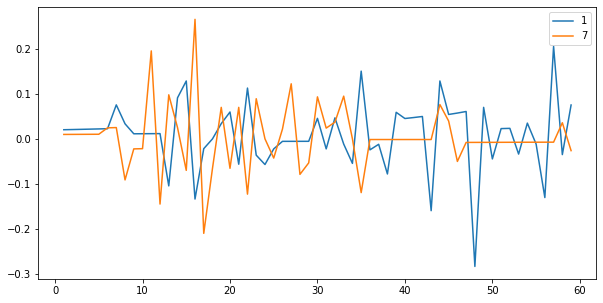

In [ ]:

plt.plot(range(0,len(ibi_all)), first.pct_change(), label = '1')

plt.plot(range(0,len(ibi_all)), ten.pct_change(), label = '7')

plt.legend()

In [ ]:
from scipy import stats

# slope, intercept, r_value, p_value, std_err = stats.linregress(x, first)
# print(r_value, p_value, std_err)
def general_trend_stat(trial):
  hold = []
  # hold = np.array(zeros(17,3))
  x = range(len(trial))
  for column in trial:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, trial.loc[:,column])
    # f"Trial # {column}:  r value is {r_value}, p_value is {p_value}, std_err is {std_err}"
    hold.append((slope, r_value, p_value, std_err))
  stat_frame = pd.DataFrame(hold, columns = ['slope', 'r_value', 'p_value', 'std_err'])
  return stat_frame

In [ ]:
general_trend_stat(ibi_all)

,slope,r_value,p_value,std_err
0,-0.067634,-0.517371,2.306853e-05,0.014689
1,-0.031953,-0.120558,3.588558e-01,0.034548
2,-0.055594,-0.264404,4.120448e-02,0.026626
3,0.187171,0.634792,5.124578e-08,0.029915
4,0.113525,0.591391,6.506782e-07,0.020326
5,0.127632,0.619013,1.349981e-07,0.021263
6,0.056422,0.596981,4.789623e-07,0.009956
7,0.000573,0.003602,9.782106e-01,0.020877
8,0.104518,0.430663,5.929454e-04,0.028760
9,0.060091,0.314197,1.449229e-02,0.023841


In [ ]:
hr_stat = general_trend_stat(eda_all)
hr_stat.slope
len(hr_stat)

plt.plot(range(0,len(hr_stat)), hr_stat.slope[:])
# hr_stat.slope[:]